# Notebook Details:
This notebook aims to solve question 8 of Team 5's tasks. The question is "How long have businesses been in operation?". We answer this question based on a licensed restaurants dataset obtained from [Analyze Boston](https://data.boston.gov/dataset/active-food-establishment-licenses/resource/f1e13724-284d-478c-b8bc-ef042aa5b70b). This dataset contains a list of restaurants that met the City's standards to become licensed food service establishments. 

Note that we are only answering this question for licensed restaurants until we can find more valid data.


2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


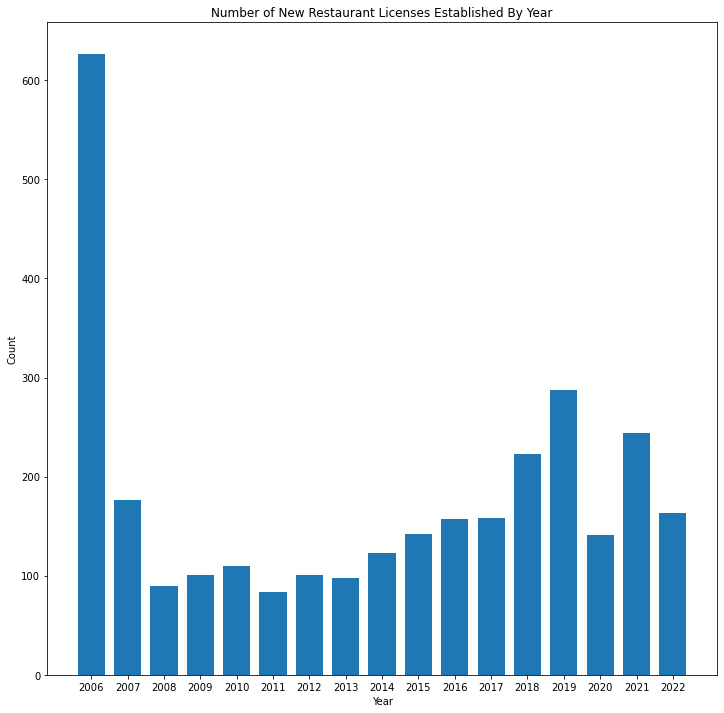

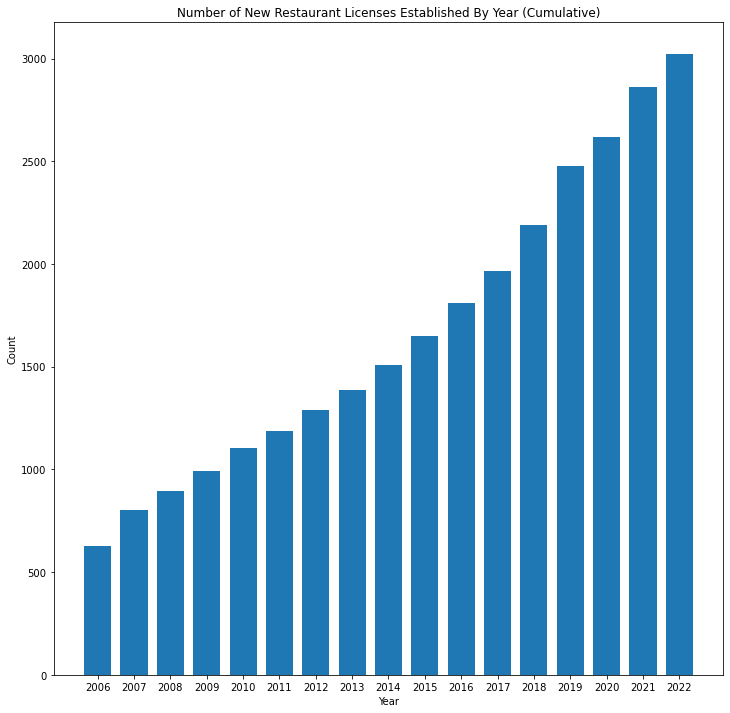

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../datasets/licensed_restaurants_boston.csv", usecols=["LicenseAddDtTm"])

data = df.to_numpy()

freq_counts = {}

# get the frequency of new restaurant licenses added per year
for license in data:
    # get first split of ISO date format, which is year
    year = int(license[0].split("-")[0])
    freq_counts[year] = freq_counts.get(year, 0) + 1

# sort to get chronological
sorted_keys = sorted(freq_counts.keys())
sorted_dict = {key:freq_counts[key] for key in sorted_keys}

# get cumulative sum of licenses per year
acc = 0
x = sorted_dict.keys()
y = []
for year in x:
    print(year)
    y.append(sorted_dict[year] + acc)
    acc += sorted_dict[year]

# plot the non-cascading plot
plt.figure(figsize=(12, 12))
plt.bar(x, sorted_dict.values(), width=0.75)
plt.title("Number of New Restaurant Licenses Established By Year")
plt.xlabel("Year")
plt.xticks(list(freq_counts.keys()))
plt.ylabel("Count")
plt.show()

# plot the cascading plot
plt.figure(figsize=(12, 12))
plt.bar(x, y, width=0.75)
plt.title("Number of New Restaurant Licenses Established By Year (Cumulative)")
plt.xlabel("Year")
plt.xticks(list(freq_counts.keys()))
plt.ylabel("Count")
plt.show()